## Day 2 

In [1]:
input = """116	1259	1045	679	1334	157	277	1217	218	641	1089	136	247	1195	239	834
269	1751	732	3016	260	6440	5773	4677	306	230	6928	7182	231	2942	2738	3617
644	128	89	361	530	97	35	604	535	297	599	121	567	106	114	480
105	408	120	363	430	102	137	283	123	258	19	101	181	477	463	279
873	116	840	105	285	238	540	22	117	125	699	953	920	106	113	259
3695	161	186	2188	3611	2802	157	2154	3394	145	2725	1327	3741	2493	3607	4041
140	1401	110	119	112	1586	125	937	1469	1015	879	1798	122	1151	100	926
2401	191	219	607	267	2362	932	2283	889	2567	2171	2409	1078	2247	2441	245
928	1142	957	1155	922	1039	452	285	467	305	506	221	281	59	667	232
3882	1698	170	5796	2557	173	1228	4630	174	3508	5629	4395	180	5100	2814	2247
396	311	223	227	340	313	355	469	229	162	107	76	363	132	453	161
627	1331	1143	1572	966	388	198	2068	201	239	176	1805	1506	1890	1980	1887
3390	5336	1730	4072	5342	216	3823	85	5408	5774	247	5308	232	256	5214	787
176	1694	1787	1586	3798	4243	157	4224	3603	2121	3733	851	2493	4136	148	153
2432	4030	3397	4032	3952	2727	157	3284	3450	3229	4169	3471	4255	155	127	186
919	615	335	816	138	97	881	790	855	89	451	789	423	108	95	116"""

In [2]:
s = 0
for line in input.split('\n'):
    row_numbers = sorted([int(val) for val in line.split()])
    for ind, divisor in enumerate(row_numbers):
        for divised in row_numbers[ind+1:]:
            if divised % divisor == 0:
                print(divisor, divised)
                s += divised // divisor
                break
s

239 1195
230 6440
106 530
102 408
105 840
157 3611
122 1586
219 2409
232 928
170 5100
132 396
198 1980
232 5336
176 4224
155 4030
95 855


226

In [3]:
row_numbers

[89, 95, 97, 108, 116, 138, 335, 423, 451, 615, 789, 790, 816, 855, 881, 919]

In [4]:
1195 % 239

0

## Day 3 

In [5]:
input = 325489

Let's build the coordinates.

In [6]:
for n in range(1, 10):
    print(n, 8 * n, 1 + sum(8 * i for i in range(n)))

1 8 1
2 16 9
3 24 25
4 32 49
5 40 81
6 48 121
7 56 169
8 64 225
9 72 289


In [7]:
s, n = 0, 0
while s < input:
    n += 1
    s = 1 + sum(8 * i for i in range(n))
n -= 1
print(n)

285


In [8]:
n

285

In [9]:
1 + sum(8 * i for i in range(n))

323761

In [10]:
coord = n - 1j * n
side_len = 2 * n

In [11]:
side_len

570

In [12]:
323761 + 4 * side_len < input

False

In [13]:
delta = input - 323761 - 3 * side_len
delta

18

In [14]:
coord += 1j * side_len - side_len -1j * side_len + delta

In [15]:
coord

(-267-285j)

In [16]:
267 + 285

552

In [17]:
{1+1j: 1}

{(1+1j): 1}

New approach and insight: start at the corners every time.

In [168]:
spiral = [(0+0j)]
for r in range(10):
    corner = r - 1j * r
    side_len = 2 * r
    current_pos = corner
    for side, direction in zip(range(4), 
                           [1j, -1, -1j, 1]):
        for step in range(side_len):
            current_pos += direction
            spiral.append(current_pos)

Let's plot this.

In [169]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

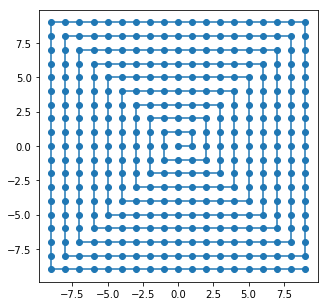

In [170]:
plt.figure(figsize=(5, 5))
plt.plot(np.real(spiral), np.imag(spiral), '-o')

Second part: let's init a large array and let's fill it.

In [238]:
def set_array(array, z, R, value):
    """Sets array value at z to value."""
    i = int(R - z.imag)
    j = int(z.real - R - 1) + 2*R+1
    array[i, j] = value

In [239]:
def test_set_array():
    R = 1
    values = np.zeros((2*R+1, 2*R+1), dtype=np.int)
    set_array(values, 0+0j, R, 2)
    assert values[1, 1] == 2
    set_array(values, 0+1j, R, 1)
    assert values[0, 1] == 1
    set_array(values, 1, R, 3)
    assert values[1, 2] == 3

In [240]:
test_set_array()

What about the sums?

In [256]:
def get_sum_around(array, z, R):
    """Gets the sum of already filled in values around z."""
    i = int(R - z.imag)
    j = int(z.real - R - 1) + 2 * R + 1
    return array[np.clip(i-1, -R, R):np.clip(i+2, -R, R), np.clip(j-1, -R, R):np.clip(j+2, -R, R)].sum()

In [257]:
def test_get_sum():
    R = 1
    values = np.zeros((2*R+1, 2*R+1), dtype=np.int)
    set_array(values, 0+0j, R, 2)
    set_array(values, 0+1j, R, 1)
    set_array(values, 1, R, 3)
    assert get_sum_around(values, 0 + 0j, R) == 6

In [258]:
test_get_sum()

AssertionError: 

In [244]:
R = 1
values = np.zeros((2*R+1, 2*R+1), dtype=np.int)
set_array(values, 0+0j, R, 2)
set_array(values, 0+1j, R, 1)
set_array(values, 1, R, 3)

In [245]:
%debug get_sum_around(values, 0 + 0j, R)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> q


In [246]:
get_sum_around(values, 0 + 0j, R)

6

In [247]:
values

array([[0, 1, 0],
       [0, 2, 3],
       [0, 0, 0]])

In [248]:
get_sum_around(values, 0+0j, R)

6

In [249]:
R = 3
values = np.zeros((2*R+1, 2*R+1), dtype=np.int)
set_array(values, 0+0j, R, 2)
set_array(values, 0+1j, R, 1)

In [250]:
get_sum_around(values, 0-2j, R)

0

In [251]:
values

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [255]:
R = 2
values = np.zeros((2*R+1, 2*R+1), dtype=np.int)
set_array(values, 0+0j, R, 1)
for r in range(R+1):
    corner = r - 1j * r
    side_len = 2 * r
    current_pos = corner
    for side, direction in zip(range(4), 
                               [1j, -1, -1j, 1]):
        for step in range(side_len):
            current_pos += direction
            current_sum = get_sum_around(values, current_pos, R)
            set_array(values, current_pos, R, current_sum)
            break
values

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  0],
       [ 0,  0,  3, 19,  7],
       [ 0,  0,  0, 29, 55]])

In [253]:
values

array([[0, 0, 0],
       [0, 2, 1],
       [0, 3, 6]])

In [254]:
corner

(1-1j)

In [177]:
side_len

2

In [178]:
corner + 1j

(1+0j)